## Random forest model to get best model out of all

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from bootstrap import ar1_bstr, ema_bstr, kf_bstr, svm_bstr, get_Y
#from bootstrap import pp_bstr
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [30]:
import import_ipynb
from Apl2_EMA_Bootstrap_Model import ema_bootstrap
from Apl3_MACD_bootstrap_Model import bootstrap
from Apl4_SVM_bootstrap_Model import svm_bstr
from Apl5_Autoregression_Bootstrap_Model import AR_bootstrap

In [31]:
AAPL = pd.read_csv('AAPL.csv')
AAPL.set_index('Date')
AAPL['OpenTmr'] = AAPL['Open'].shift(-1)
AAPL['CloseTmr'] = AAPL['Close'].shift(-1)
AAPL['OpenClose']= (AAPL['Open']+ AAPL['Close'])/2
AAPL['HighLow'] = (AAPL['High']+ AAPL['Low'])/2
AAPL['OCHL'] = (AAPL['Open']+ AAPL['Close']+AAPL['High']+ AAPL['Low'])/4
AAPL['CloseYest'] = AAPL['Close'].shift(-1)
AAPL['Close2dayBefore'] = AAPL['Close'].shift(-2)
#AAPL.head()
AAPL['Date'] = pd.to_datetime(AAPL['Date'], infer_datetime_format=True)
AAPL=AAPL.set_index('Date')
AAPL.index = AAPL.index.map(lambda x: x.strftime('%Y-%m-%d'))
# AAPL = AAPL.dropna(0)
AAPL.tail()

,Open,Close,High,Low,Volume,OpenTmr,CloseTmr,OpenClose,HighLow,OCHL,CloseYest,Close2dayBefore
2019-06-24,198.539993,198.580002,200.160004,198.169998,18220400,198.429993,195.570007,198.559998,199.165001,198.862499,195.570007,199.800003
2019-06-25,198.429993,195.570007,199.259995,195.289993,21070300,197.770004,199.800003,197.000000,197.274994,197.137497,199.800003,199.740005
2019-06-26,197.770004,199.800003,200.990005,197.350006,26067500,200.289993,199.740005,198.785004,199.170006,198.977505,199.740005,197.919998
2019-06-27,200.289993,199.740005,201.570007,199.570007,20899700,198.679993,197.919998,200.014999,200.570007,200.292503,197.919998,NaN
2019-06-28,198.679993,197.919998,199.500000,197.050003,31110600,NaN,NaN,198.299995,198.275002,198.287499,NaN,NaN


In [32]:
N = AAPL.shape[0] 
num_boot = 300 # total num bootstrap
T= 250 # start day
window = 200 # training period window
Y =AAPL['OpenTmr'][-(N-(T+1)):].values
Y_close = AAPL['CloseTmr'][-(N-(T+1)):].values

In [33]:
print("--------------------- Y -------------------------\n",Y)
print("\n\n\n--------------------- Y_close -------------------------\n",Y_close)

--------------------- Y -------------------------
 [115.800003 115.849998 115.919998 116.779999 117.949997 118.769997
 118.739998 118.900002 119.110001 118.339996 120.       119.400002
 120.449997 120.       119.550003 120.419998 121.669998 122.139999
 120.93     121.150002 127.029999 127.980003 128.309998 129.130005
 130.539993 131.350006 131.649994 132.460007 133.080002 133.470001
 135.520004 135.669998 135.100006 136.229996 136.429993 137.380005
 135.910004 137.139999 137.080002 137.889999 140.       138.779999
 139.369995 139.059998 138.949997 138.740005 139.25     138.850006
 139.300003 139.410004 140.720001 141.       140.399994 142.110001
 139.850006 141.259995 141.5      139.389999 140.910004 143.679993
 144.190002 143.720001 143.710007 143.25     144.220001 144.289993
 143.729996 143.600006 142.940002 141.600006 141.910004 141.479996
 141.410004 141.880005 141.220001 142.440002 143.5      143.910004
 144.470001 143.919998 144.089996 145.100006 147.539993 145.589996
 146.520004

In [36]:
yhat_ar1, rmse_ar1 = AR_bootstrap()    
yhat_ema, rmse_ema = ema_bootstrap()
#yhat_pp, rmse_pp = pp_bstr()  # too slow 
yhat_macd, rmse_macd = bootstrap()
#num_boot = 1
yhat_svm, rmse_svm = svm_bstr()
    
print("AR_RMSE: ", rmse_ar1)
print("EMA_RMSE: ", rmse_ema)
print("MACD_RMSE: ", rmse_macd)
#print("kf_RMSE: ", rmse_kf)
print("SVM_RMSE: ", rmse_svm)

AR_RMSE:  nan
EMA_RMSE:  4.2342257138635535
MACD_RMSE:  4.311557789157198
SVM_RMSE:  10.518143988866004


In [38]:
def random_forest():
    "random forest voting"
    T=Y.shape[0]-1
    print(T)
    Y_rf = np.zeros(T)
    for t in range(0, T):
        if min(abs(yhat_ema[t]-Y[t]),abs(yhat_macd[t]-Y[t]),abs(yhat_ar1[t]-Y[t]),abs(yhat_svm[t]-Y[t]))==abs(yhat_ema[t]-Y[t]):
            Y_rf[t] = yhat_ema[t]
        elif min(abs(yhat_ema[t]-Y[t]),abs(yhat_macd[t]-Y[t]),abs(yhat_ar1[t]-Y[t]),abs(yhat_svm[t]-Y[t]))==abs(yhat_macd[t]-Y[t]):
            Y_rf[t] = yhat_macd[t]
        elif min(abs(yhat_macd[t]-Y[t]),abs(yhat_ema[t]-Y[t]),abs(yhat_svm[t]-Y[t]),abs(yhat_ar1[t]-Y[t]))==abs(yhat_ar1[t]-Y[t]):
            Y_rf[t] = yhat_ar1[t]          
        else:
            Y_rf[t] = yhat_svm[t]  
    
    rmse_rf=np.sqrt(np.mean((Y[:-1]-Y_rf)**2))
    print("random forest rmse: ", rmse_rf)
    return Y, Y_rf, Y_close

In [39]:
Y, Y_rf, Y_close = random_forest()

626
random forest rmse:  3.2623333167649857


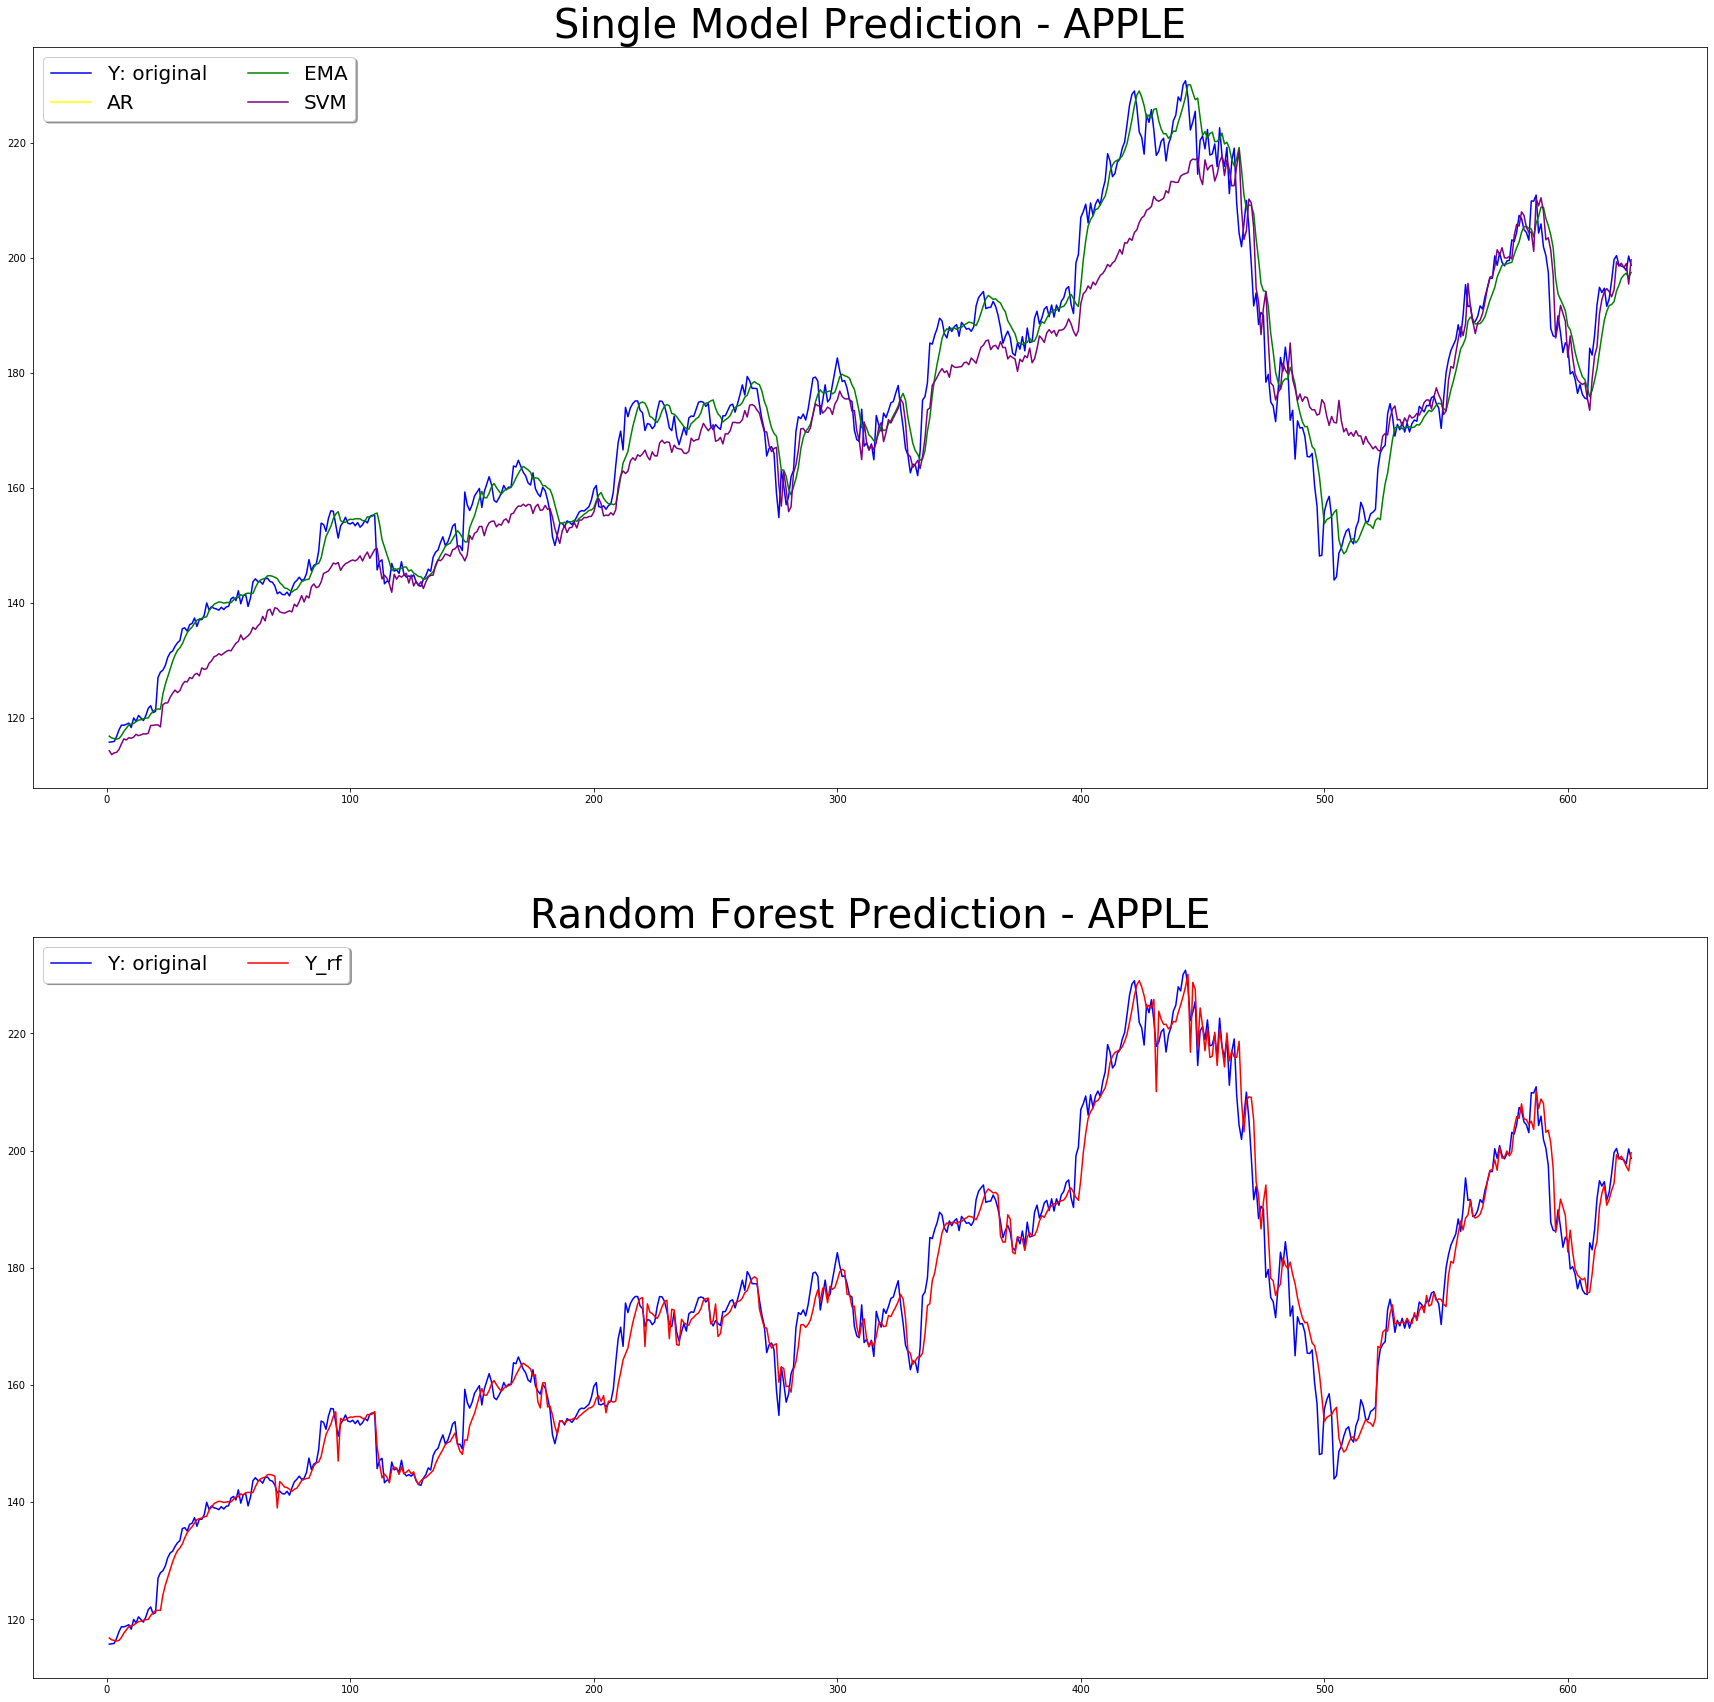

In [48]:
timevec = np.linspace(1,626,626)
plt.figure(figsize=(30,30))
ax = plt.subplot(211)
ax.plot(timevec, Y[:-1], 'blue', label = "Y: original")
ax.plot(timevec, yhat_ar1[:-111], 'Yellow', label = "AR")
ax.plot(timevec, yhat_ema[:-111], 'green', label = "EMA")
ax.plot(timevec, yhat_svm[:-111], 'purple', label = "SVM")
plt.title('Single Model Prediction - APPLE', size=40)
ax.legend(loc=2, bbox_to_anchor=(0.0, 1.00), shadow=True, ncol=2, prop={'size': 20})
ax = plt.subplot(212)
ax.plot(timevec, Y[:-1], 'blue', label = "Y: original")
ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
plt.title('Random Forest Prediction - APPLE', size=40)
ax.legend(loc=2, bbox_to_anchor=(0.0, 1.00), shadow=True, ncol=2, prop={'size': 20})
plt.show()
